__Life cycle of Machine learning Project__

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

# **1)PROBLEM STATEMENT**

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

**Attribute Information:**

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire






#  **Loading Packages**

In [1]:
import pandas as pd
#For mathematical calculations
import numpy as np
#for plotting graph
import matplotlib.pyplot as plt
#for data visualization
import seaborn as sns
# for ignoring warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 2) DATA COLLECTION

__Data:__  

This is a practice problem and data collected from kaggle

**Reading the dataset**

In [2]:
#keeping row number 1 as header
data=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
#Lets make a copy of dataset so even if we have to make any changes in dataset would not lose the original data
#data_original=data.copy()

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


# **Features in data**

In [5]:
# We will check the columns present in the dataset and tyen we can check the data type
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

**observation:**
- Dtype is 'Object' for all colums
-There is whitespace in the left and right of feature names

**understanding the shape and size**

In [6]:
data.shape


(247, 14)

In [7]:
data.size

3458

**observations:**
- There are 247 rows and 14 colums in the data
- We are provided with 244 total instances as per the provided dataset information.


**Identifying the mismatch in number of rows**

In [8]:
data.iloc[122:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


**Removing the midle header row from csv**

In [9]:
# Here we will remove header line and region name provided in the middle of the dataset and and join both region data together.
df= data.drop(labels=range(122,125), axis=0)

**Varifying the deletion of mismatched rows**

In [10]:
df.iloc[120:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


**Resetting the indeces after dropping the rows**

In [11]:
df.reset_index(inplace=True)

In [12]:
# varyfy whether the indeces are resetted properly
df.iloc[120:]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [13]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

**Observation:**
- new feature named "index" is created at the column index "0"

**Droping the  newly observed index column**

In [14]:
df1=df.drop('index',axis=1,inplace=True)

**Rechecking the shape and size of provided dataset**

In [15]:
df.shape

(244, 14)

In [16]:
df.size

3416

**observations:**
- removed the repeated header line from the 128th row and region name from 127th line
- removed the "index" column

**seeing the top 5 rows**


In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


**Creating a new column:**
- Adding a new column to the dataframe which represents the region 
-The Bejaia region located in the northeast of Algeria as"1"
- The Sidi Bel-abbes region located in the northwest of Algeria as "2".

In [18]:
df.index

RangeIndex(start=0, stop=244, step=1)

In [19]:
df["Region"]="region"

In [20]:
#keeping region as "1" from index no.1 to 122
df['Region'][0:122] = 1

In [21]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [22]:
#keeping region as "2" from index no.122 till end
df['Region'][122:] = 2

In [23]:
#seeing the first few rows of dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [24]:
#checking data from row number 122
df.iloc[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


**Rechecking the size and shape**

In [25]:
df.size

3660

In [26]:
df.shape

(244, 15)

# **Summary of the dataset**

In [27]:
#Display summary statistics of the Dataframe
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,126,8,2
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,1
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


In [28]:
# fetching  informations about null values and datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [29]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

**Observations:**

- the Dtype is 'Object" for all feature columns
- There is whitespace in the left and right of feature names

1) **Removing the spaces from  the feature columns**


In [30]:
# striping the names
df.columns=[i.strip() for i in df.columns]
#seeing striped column names
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [31]:
#striping the "classes" column
df.Classes=df.Classes.str.strip()
df["Classes"].unique()

array(['not fire', 'fire', nan], dtype=object)

2)**Changing the datatypes of the columns**

In [32]:
# changing all numeric columns to "int" dtype
df['day']=df['day'].astype("int")
df['month']=df['month'].astype("int")
df['year']=df['year'].astype("int")
df['Temperature']=df['Temperature'].astype("int")
df['RH']=df['RH'].astype("int")
df['Ws']=df['Ws'].astype("int")
df['Region']=df['Region'].astype("int")
# changing all decimal valued  columns to "float" dtype

df['Rain']=df['Rain'].astype("float")
df['FFMC']=df['FFMC'].astype("float")
df['DMC']=df['DMC'].astype("float")
df['DC']=df['DC'].astype("float")
df['ISI']=df['ISI'].astype("float")
df['BUI']=df['BUI'].astype("float")



In [33]:
#checking the Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(6), int32(7), object(2)
memory usage: 22.0+ KB


# Analysing Categorical column "Classes" 

In [34]:
#checking null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [35]:
#checking unique valus in Classes column
df["Classes"].unique()

array(['not fire', 'fire', nan], dtype=object)

**Observation:**
- Classes having one Null value

# missing value handling

In [36]:
# since we have one categorical column named "Classes" and it consist of one null value . we can either drop the entire row or we can replace it with "mode"
df["Classes"].mode()[0]
df["Classes"]=df["Classes"].fillna(df["Classes"].mode()[0])

 #checking the null values
df.isnull().sum().sum()

0

- The missing value is sucessfully replaced

# Changing the categorical data to numerical data

In [37]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Classes']= label_encoder.fit_transform(df['Classes'])
  
df['Classes'].unique()

array([1, 0])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    int32  
dtypes: float64(6), int32(8), object(1)
memory usage: 21.1+ KB


In [39]:
df["FWI"].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',

In [40]:
#df.iloc[165:]
# replace fire with an arbitary value,here "0"
df["FWI"].replace('fire   ',0,inplace=True)



In [41]:
df["FWI"].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 0, '14.1', '9.1', '13', '17.3',
       '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6', '12.7',
       '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3', '12.2',
       '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16', '19.4',
       '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4', '15.2',

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    int32  
dtypes: float64(6), int32(8), object(1)
memory usage: 21.1+ KB


In [43]:
#changing the data type of "FWI" column
df["FWI"]=df["FWI"].astype("float")

# Summary Statistics

In [44]:
#Display summary statistics of the Dataframe after cleaning the data

df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006557,0.434426,1.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438889,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,1.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.000000,1.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,2.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 21.1 KB


**Conclusion:**
**Entire categorical data is converted to numerical data**

# Replacing "day","month","year" features with "data" feature

In [46]:
df["date"]=pd.to_datetime(df[["day","month","year"]])
df.drop(["day","month","year"],axis=1,inplace=True)

In [47]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,2,2012-09-26
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,2,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,2,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,2,2012-09-29


# Univariate Analysis

Here we analyse each variable indivudually

**Target Variable**
- analysis if feature" Classes"

In [48]:
# Frequency table
df["Classes"].value_counts()

0    138
1    106
Name: Classes, dtype: int64

In [49]:
#To get percentage instead of value_count
df["Classes"].value_counts(normalize=True)


0    0.565574
1    0.434426
Name: Classes, dtype: float64

<AxesSubplot:>

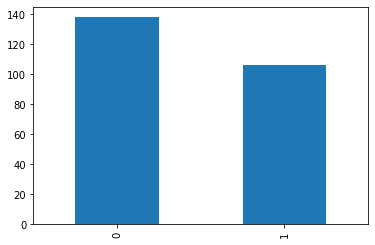

In [50]:
#plotting graph
df["Classes"].value_counts().plot.bar()

**Observation:**
- 1-not fire,0-fire
- 138(56.5%) not got fire out of 244 instances

**Numerical Feature**

1)Temperature

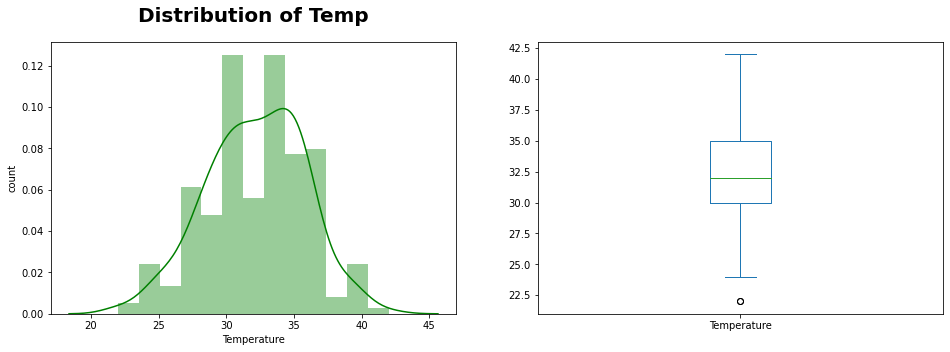

In [51]:
plt.figure(1)
plt.subplot(121)
sns.distplot("Distribution of Temp",x=df["Temperature"],color='g',kde=True)
plt.title("Distribution of Temp",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature")
plt.ylabel("count")
plt.subplot(122)
df["Temperature"].plot.box(figsize=(16,5))
plt.show()

**Obsevation:**Temperature varies between 30 t0 35 in most of the instances

Text(0.5, 0.98, '')

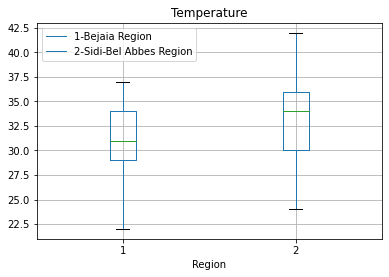

In [52]:
df.boxplot(column="Temperature",by="Region")
plt.legend(["1-Bejaia Region","2-Sidi-Bel Abbes Region"], loc=0)
plt.suptitle("")

2)RH : Relative Humidity

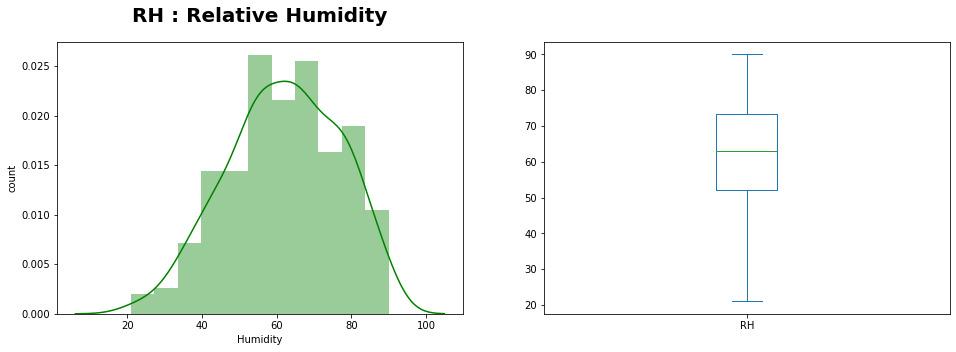

In [53]:
plt.figure(1)
plt.subplot(121)
sns.distplot("Relative Humidity",x=df["RH"],color='g',kde=True)
plt.title("RH : Relative Humidity",weight='bold',fontsize=20,pad=20)
plt.xlabel("Humidity")
plt.ylabel("count")
plt.subplot(122)
df["RH"].plot.box(figsize=(16,5))
plt.show()

3) Ws :Wind speed in km/h

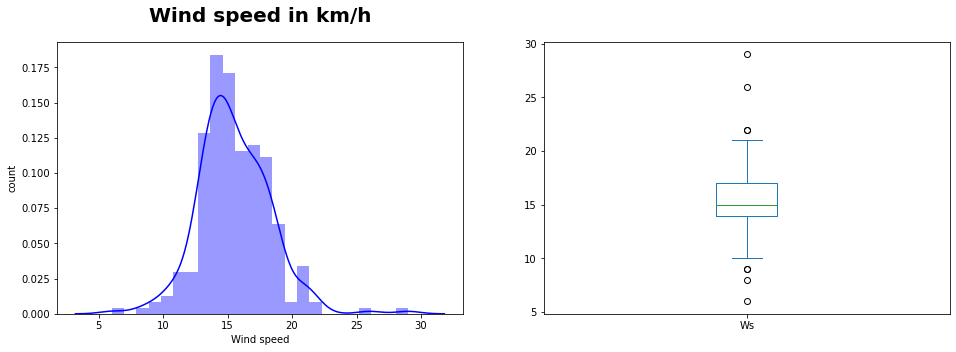

In [54]:
plt.figure(1)
plt.subplot(121)
sns.distplot("Wind speed in km/h",x=df["Ws"],color='b',kde=True)
plt.title("Wind speed in km/h",weight='bold',fontsize=20,pad=20)
plt.xlabel("Wind speed")
plt.ylabel("count")
plt.subplot(122)
df["Ws"].plot.box(figsize=(16,5))
plt.show()

**Observations**
- We could see outliers in windspeed

3)Rain

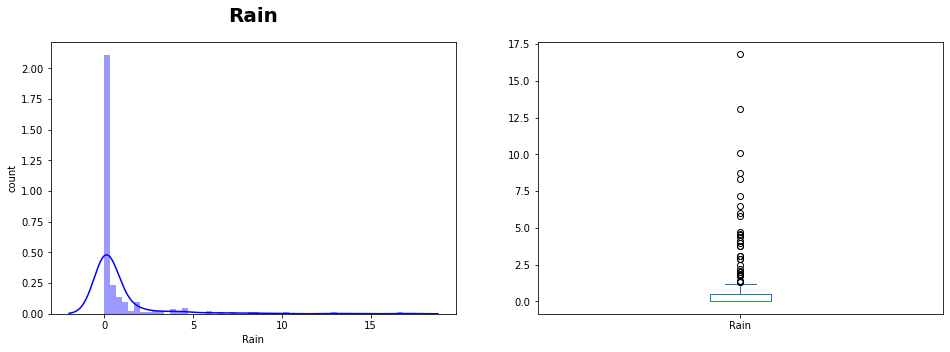

In [55]:
plt.figure(1)
plt.subplot(121)
sns.distplot("Rain",x=df["Rain"],color='b',kde=True)
plt.title("Rain",weight='bold',fontsize=20,pad=20)
plt.xlabel("Rain")
plt.ylabel("count")
plt.subplot(122)
df["Rain"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

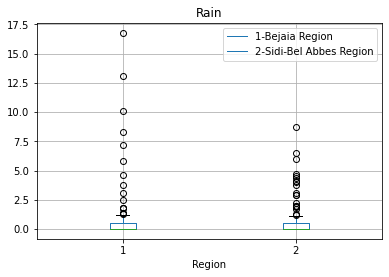

In [56]:
df.boxplot(column="Rain",by="Region")
plt.legend(["1-Bejaia Region","2-Sidi-Bel Abbes Region"], loc=0)
plt.suptitle("")

**Observations:** It has many  outliers

3)Fine Fuel Moisture Code (FFMC)

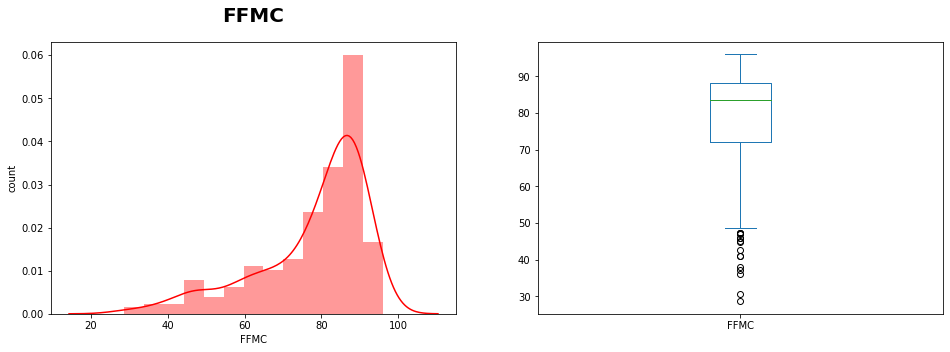

In [57]:
plt.figure(1)
plt.subplot(121)
sns.distplot("FFMC",x=df["FFMC"],color='r',kde=True)
plt.title("FFMC",weight='bold',fontsize=20,pad=20)
plt.xlabel("FFMC")
plt.ylabel("count")
plt.subplot(122)
df["FFMC"].plot.box(figsize=(16,5))
plt.show()

**Observations:** It has many  outliers

4)Duff Moisture Code (DMC)

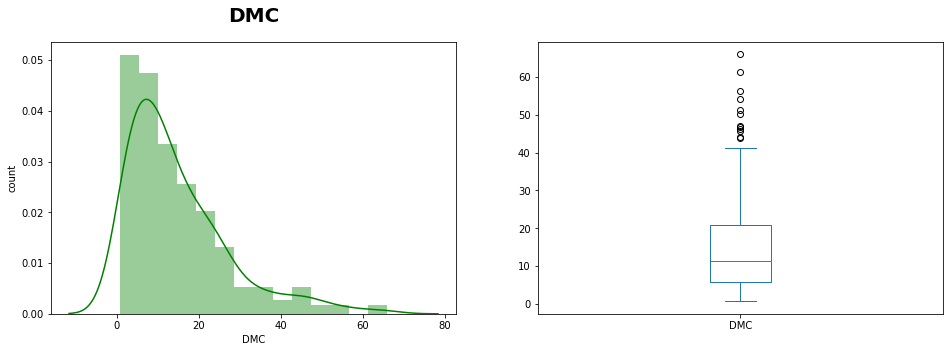

In [58]:
plt.figure(1)
plt.subplot(121)
sns.distplot("DMC",x=df["DMC"],color='g',kde=True)
plt.title("DMC",weight='bold',fontsize=20,pad=20)
plt.xlabel("DMC")
plt.ylabel("count")
plt.subplot(122)
df["DMC"].plot.box(figsize=(16,5))
plt.show()

**Observations:** It has many  outliers

5)Drought Code (DC) index

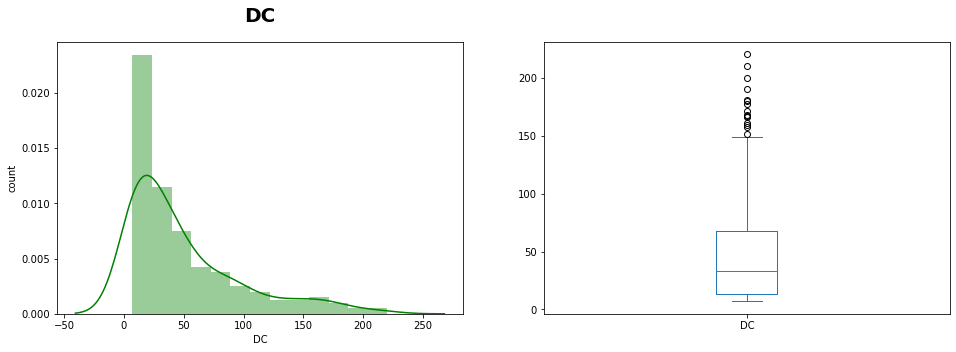

In [59]:
plt.figure(1)
plt.subplot(121)
sns.distplot("DC",x=df["DC"],color='g',kde=True)
plt.title("DC",weight='bold',fontsize=20,pad=20)
plt.xlabel("DC")
plt.ylabel("count")
plt.subplot(122)
df["DC"].plot.box(figsize=(16,5))
plt.show()

**Observations:** DC has many outliers

6)Initial Spread Index (ISI)

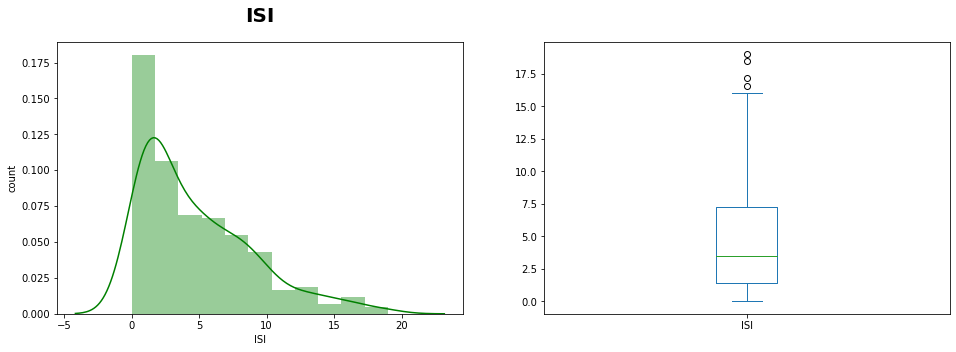

In [60]:
plt.figure(1)
plt.subplot(121)
sns.distplot("ISI",x=df["ISI"],color='g',kde=True)
plt.title("ISI",weight='bold',fontsize=20,pad=20)
plt.xlabel("ISI")
plt.ylabel("count")
plt.subplot(122)
df["ISI"].plot.box(figsize=(16,5))
plt.show()

**Observations:** ISI has many outliers

7)Buildup Index (BUI) 

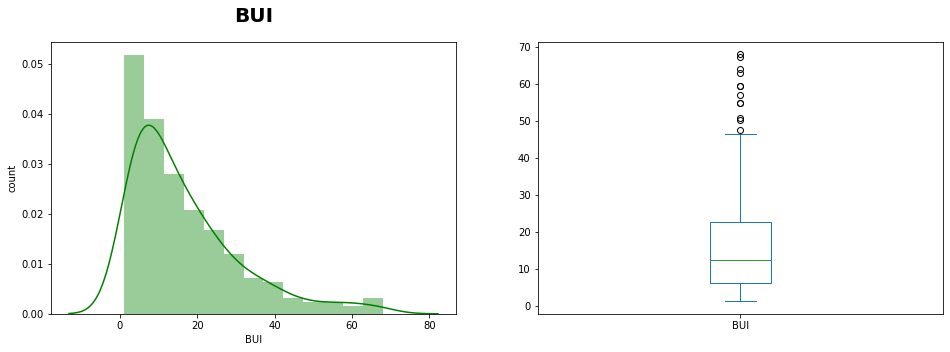

In [61]:
plt.figure(1)
plt.subplot(121)
sns.distplot("BUI",x=df["BUI"],color='g',kde=True)
plt.title("BUI",weight='bold',fontsize=20,pad=20)
plt.xlabel("BUI")
plt.ylabel("count")
plt.subplot(122)
df["BUI"].plot.box(figsize=(16,5))
plt.show()

8)Fire Weather Index (FWI)

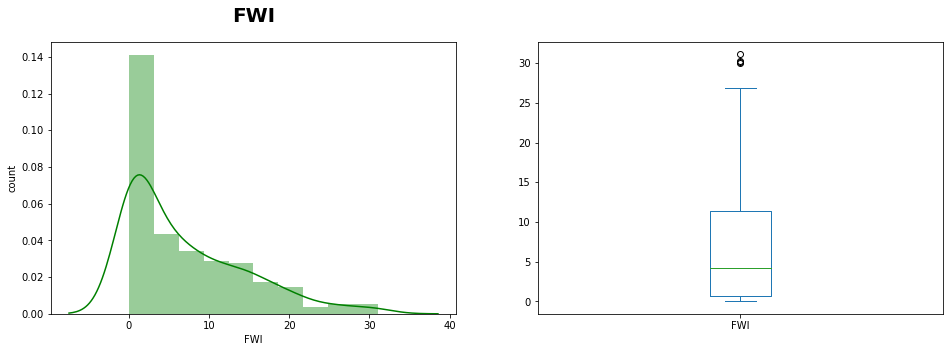

In [62]:
plt.figure(1)
plt.subplot(121)
sns.distplot("FWI",x=df["FWI"],color='g',kde=True)
plt.title("FWI",weight='bold',fontsize=20,pad=20)
plt.xlabel("FWI")
plt.ylabel("count")
plt.subplot(122)
df["FWI"].plot.box(figsize=(16,5))
plt.show()

**Observations:** DC has many outliers

# Multivariate Analysis

- Now let us see the corelation between all the numerical variables
- Let's use heatmap to visualize the corelation

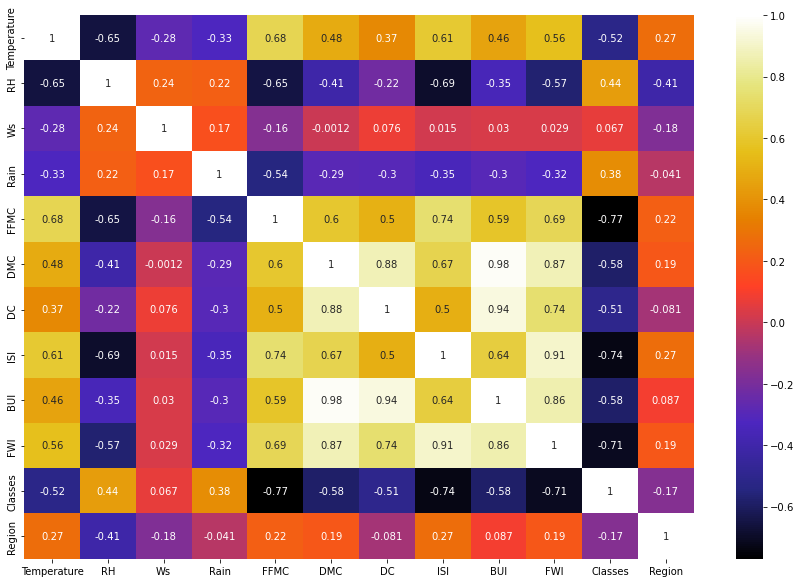

In [63]:
matrix=df.corr()

f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(matrix,annot=True,cmap="CMRmap")
plt.show()

# Bivariate analysis

**Independent variable Vs Target variable**

<AxesSubplot:xlabel='Temperature'>

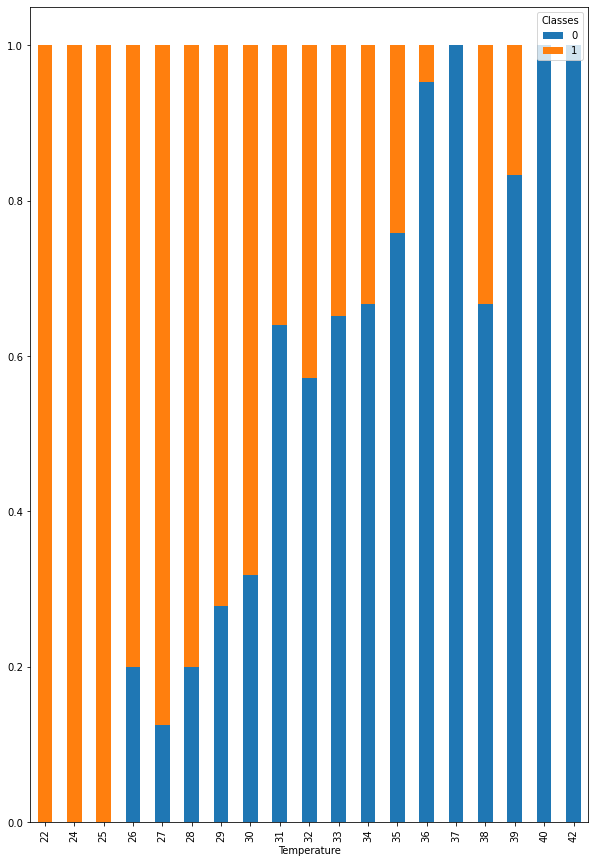

In [64]:
#Temperature Vs Classes
Temperature=pd.crosstab(df["Temperature"],df["Classes"])
Temperature.div(Temperature.sum(1),axis=0).plot(kind="bar",stacked=True,figsize=(10,15))

Text(0, 0.5, 'Mean Temp')

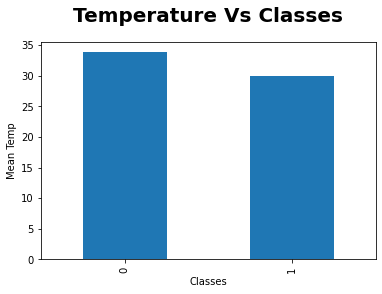

In [65]:
df.groupby('Classes')["Temperature"].mean().plot.bar()
plt.title("Temperature Vs Classes",weight='bold',fontsize=20,pad=20)
plt.xlabel("Classes")
plt.ylabel("Mean Temp")

<AxesSubplot:xlabel='RH'>

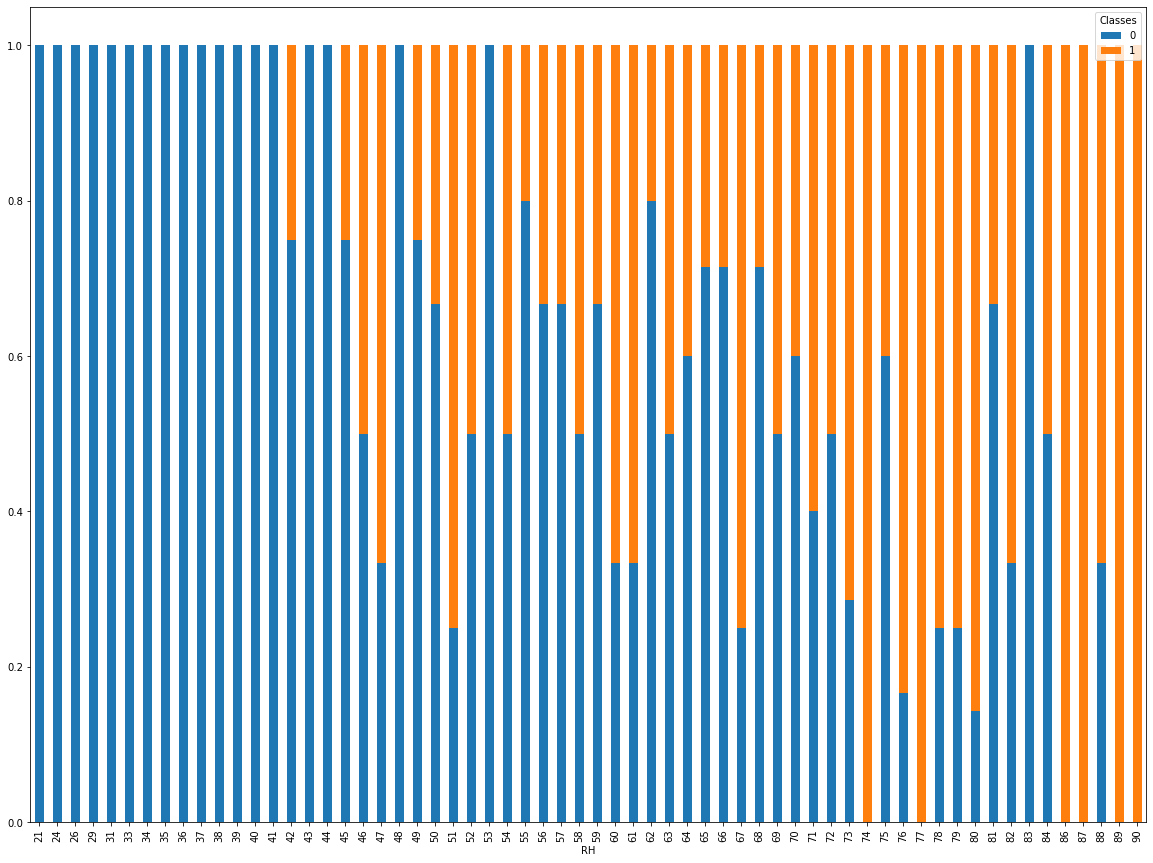

In [66]:
# Relative Humidity Vs Classes
RelativeHumidity=pd.crosstab(df["RH"],df["Classes"])
RelativeHumidity.div(RelativeHumidity.sum(1),axis=0).plot(kind="bar",stacked=True,figsize=(20,15))

<AxesSubplot:xlabel='Rain'>

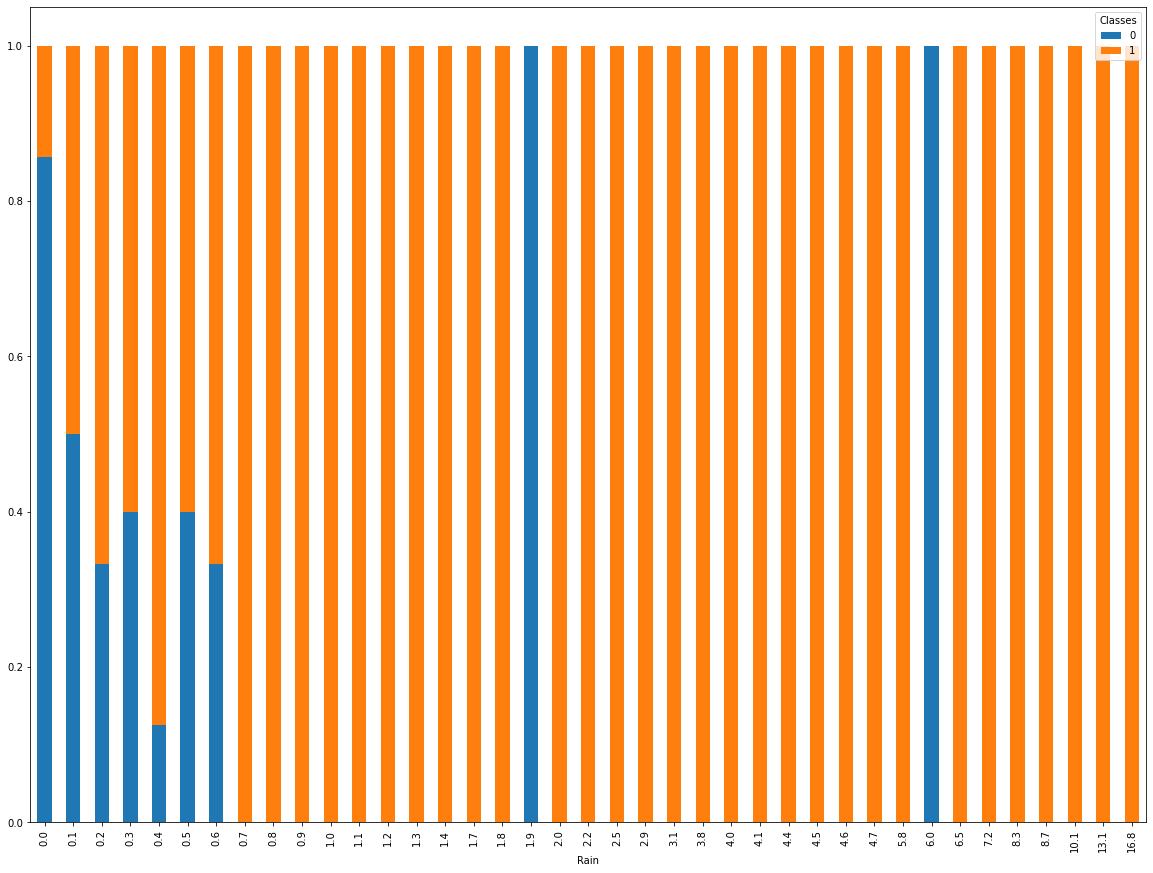

In [67]:
# Rain Vs Classes
Rain=pd.crosstab(df["Rain"],df["Classes"])
Rain.div(Rain.sum(1),axis=0).plot(kind="bar",stacked=True,figsize=(20,15))


Text(0, 0.5, 'Mean Rainfall')

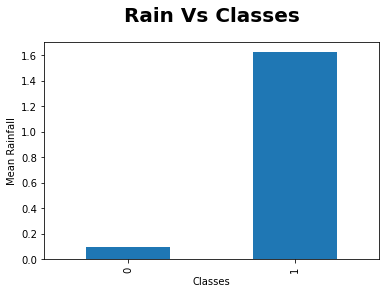

In [68]:
df.groupby('Classes')["Rain"].mean().plot.bar()
plt.title("Rain Vs Classes",weight='bold',fontsize=20,pad=20)
plt.xlabel("Classes")
plt.ylabel("Mean Rainfall")

**Observations:**
when mean rainfall is high there is no fire.

<AxesSubplot:xlabel='Ws'>

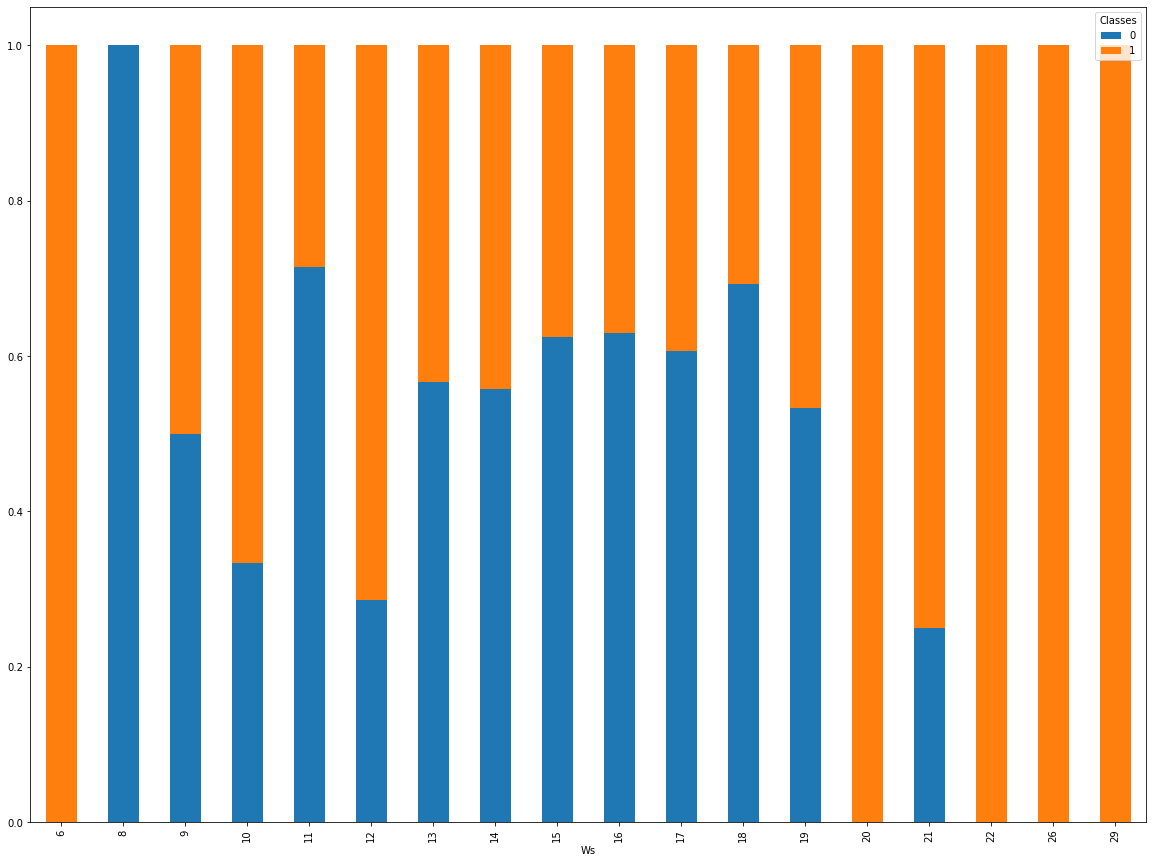

In [69]:
# Windspeed Vs Classes
WindSpeed=pd.crosstab(df["Ws"],df["Classes"])
WindSpeed.div(WindSpeed.sum(1),axis=0).plot(kind="bar",stacked=True,figsize=(20,15))


Text(0, 0.5, 'Mean WindSpeed')

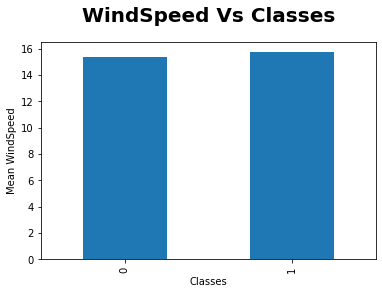

In [70]:
df.groupby('Classes')["Ws"].mean().plot.bar()
plt.title("WindSpeed Vs Classes",weight='bold',fontsize=20,pad=20)
plt.xlabel("Classes")
plt.ylabel("Mean WindSpeed")

# Outlier treatment

**WindSpeed(Ws)**

<AxesSubplot:xlabel='Ws'>

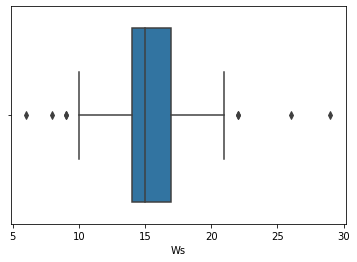

In [71]:
#Box-plot for the skewed feature
sns.boxplot(df['Ws'])

In [72]:
#Finding the IQR
percentile25 = df['Ws'].quantile(0.25)
percentile75 = df['Ws'].quantile(0.75)
IQR=percentile75-percentile25
IQR

3.0

In [73]:
#upper and lower limit
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
upper_limit,lower_limit

(21.5, 9.5)

In [74]:
# Outliers
df[df['Ws'] > upper_limit]
df[df['Ws'] < lower_limit]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
176,39,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,1,2,2012-07-25
199,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,0,2,2012-08-17
232,29,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,0,2,2012-09-19
237,26,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,1,2,2012-09-24


In [75]:
#Capping(Winsorization)
df['Ws'] = np.where(df['Ws'] >= upper_limit,
        upper_limit,
        np.where(df['Ws'] <= lower_limit,
        lower_limit,
        df['Ws']))
df.shape

(244, 13)

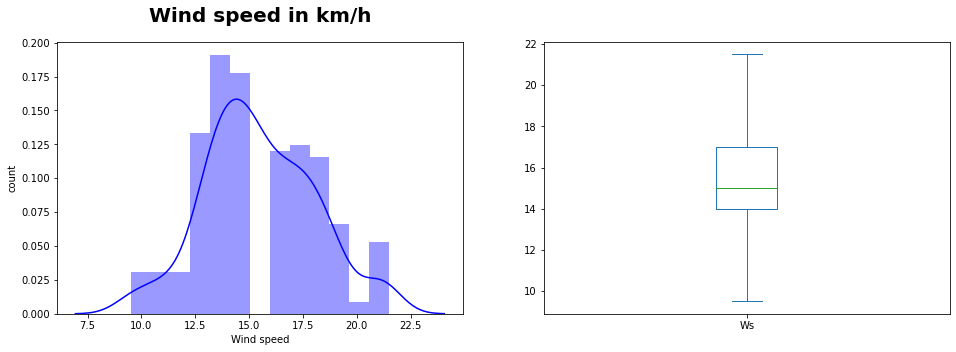

In [76]:
 #Compare the distribution and box-plot after capping
#sns.distplot(df['Ws'])
#sns.boxplot(df['Ws'])
plt.figure(1)
plt.subplot(121)
sns.distplot("Wind speed in km/h",x=df["Ws"],color='b',kde=True)
plt.title("Wind speed in km/h",weight='bold',fontsize=20,pad=20)
plt.xlabel("Wind speed")
plt.ylabel("count")
plt.subplot(122)
df["Ws"].plot.box(figsize=(16,5))
plt.show()

**Observations:**
- Outliers got removed 
- Distribution looks close to normal distribution

**Rain**

<AxesSubplot:xlabel='Rain'>

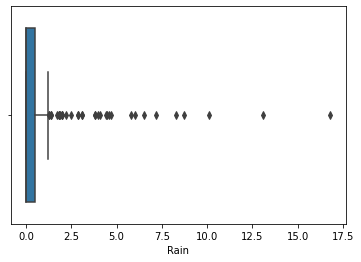

In [77]:
#Box-plot for the skewed feature
sns.boxplot(df['Rain'])

In [78]:
#Finding the IQR
percentile25 = df['Rain'].quantile(0.25)
percentile75 = df['Rain'].quantile(0.75)
IQR=percentile75-percentile25
IQR

0.5

In [79]:
#upper and lower limit
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
upper_limit,lower_limit

(1.25, -0.75)

In [80]:
# Outliers
df[df['Rain'] > upper_limit]


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1,2012-06-02
2,26,82,21.5,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1,2012-06-04
14,28,80,17.0,3.1,49.4,3.0,7.4,0.4,3.0,0.1,1,1,2012-06-15
38,32,68,14.0,1.4,66.6,7.7,9.2,1.1,7.4,0.6,1,1,2012-07-09
91,28,80,21.0,16.8,52.5,8.7,8.7,0.6,8.3,0.3,1,1,2012-08-31
92,25,76,17.0,7.2,46.0,1.3,7.5,0.2,1.8,0.1,1,1,2012-09-01
93,22,86,15.0,10.1,30.5,0.7,7.0,0.0,1.1,0.0,1,1,2012-09-02
94,25,78,15.0,3.8,42.6,1.2,7.5,0.1,1.7,0.0,1,1,2012-09-03
101,33,73,12.0,1.8,59.9,2.2,8.9,0.7,2.7,0.3,1,1,2012-09-10


In [81]:
#Capping(Winsorization)
df['Rain'] = np.where(df['Rain'] >= upper_limit,
        upper_limit,df['Rain'])
df.shape

(244, 13)

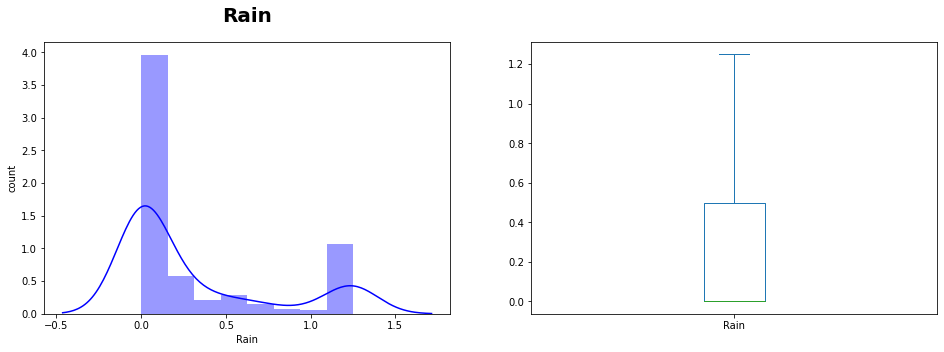

In [82]:
#Compare the distribution and box-plot after capping
plt.figure(1)
plt.subplot(121)
sns.distplot("Rain",x=df["Rain"],color='b',kde=True)
plt.title("Rain",weight='bold',fontsize=20,pad=20)
plt.xlabel("Rain")
plt.ylabel("count")
plt.subplot(122)
df["Rain"].plot.box(figsize=(16,5))
plt.show()

**Fine Fuel Moisture Code (FFMC)**

<AxesSubplot:xlabel='FFMC'>

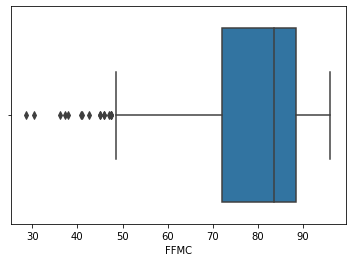

In [83]:
#Box-plot for the skewed feature
sns.boxplot(df['FFMC'])

In [84]:
#Finding the IQR
percentile25 = df['FFMC'].quantile(0.25)
percentile75 = df['FFMC'].quantile(0.75)
IQR=percentile75-percentile25
IQR

16.224999999999994

In [85]:
#upper and lower limit
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
upper_limit,lower_limit

(112.63749999999999, 47.73750000000001)

In [86]:
#Capping(Winsorization)
df['FFMC'] = np.where(df['FFMC'] >= upper_limit,
        upper_limit,
        np.where(df['FFMC'] <= lower_limit,
        lower_limit,
        df['FFMC']))
df.shape

(244, 13)

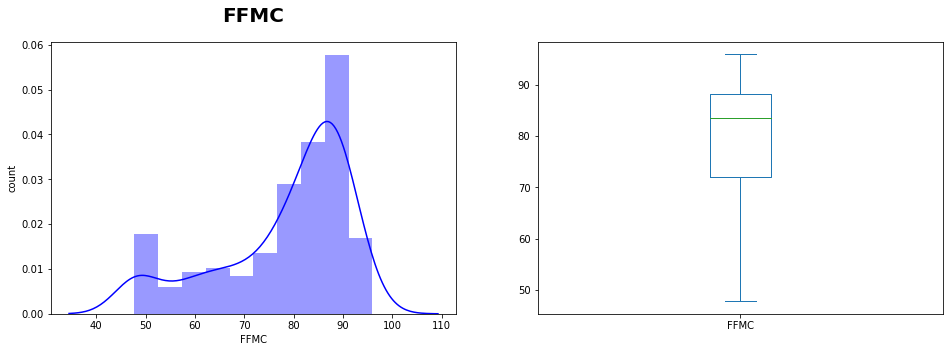

In [88]:
#Compare the distribution and box-plot after capping
plt.figure(1)
plt.subplot(121)
sns.distplot("FFMC",x=df["FFMC"],color='b',kde=True)
plt.title("FFMC",weight='bold',fontsize=20,pad=20)
plt.xlabel("FFMC")
plt.ylabel("count")
plt.subplot(122)
df["FFMC"].plot.box(figsize=(16,5))
plt.show()

**Duff Moisture Code (DMC)**

<AxesSubplot:xlabel='DMC'>

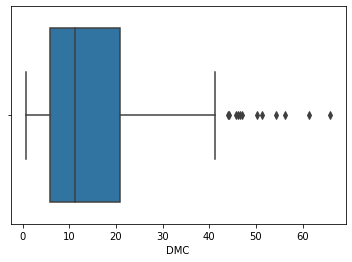

In [89]:
#Box-plot for the skewed feature
sns.boxplot(df['DMC'])

In [90]:
#Finding the IQR
percentile25 = df['DMC'].quantile(0.25)
percentile75 = df['DMC'].quantile(0.75)
IQR=percentile75-percentile25
IQR

14.95

In [91]:
#upper and lower limit
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
upper_limit,lower_limit

(43.175, -16.624999999999996)

In [92]:
#Capping(Winsorization)
df['DMC'] = np.where(df['DMC'] >= upper_limit,
        upper_limit,
        np.where(df['DMC'] <= lower_limit,
        lower_limit,
        df['DMC']))
df.shape

(244, 13)

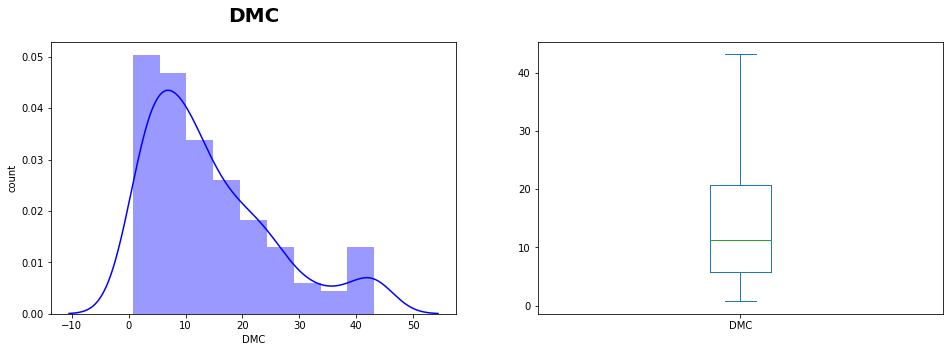

In [93]:
#Compare the distribution and box-plot after capping
plt.figure(1)
plt.subplot(121)
sns.distplot("DMC",x=df["DMC"],color='b',kde=True)
plt.title("DMC",weight='bold',fontsize=20,pad=20)
plt.xlabel("DMC")
plt.ylabel("count")
plt.subplot(122)
df["DMC"].plot.box(figsize=(16,5))
plt.show()

**Drought Code (DC) index**

<AxesSubplot:xlabel='DC'>

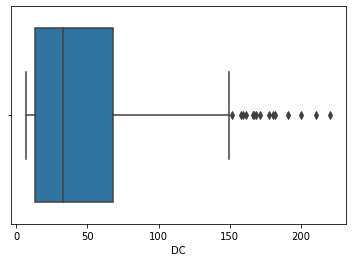

In [94]:
#Box-plot for the skewed feature
sns.boxplot(df['DC'])

In [96]:
#Finding the IQR
percentile25 = df['DC'].quantile(0.25)
percentile75 = df['DC'].quantile(0.75)
IQR=percentile75-percentile25
IQR

54.87500000000001

In [97]:
#upper and lower limit
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
upper_limit,lower_limit

(150.46250000000003, -69.03750000000002)

In [98]:
#Capping(Winsorization)
df['DC'] = np.where(df['DC'] >= upper_limit,
        upper_limit,
        np.where(df['DC'] <= lower_limit,
        lower_limit,
        df['DC']))
df.shape

(244, 13)

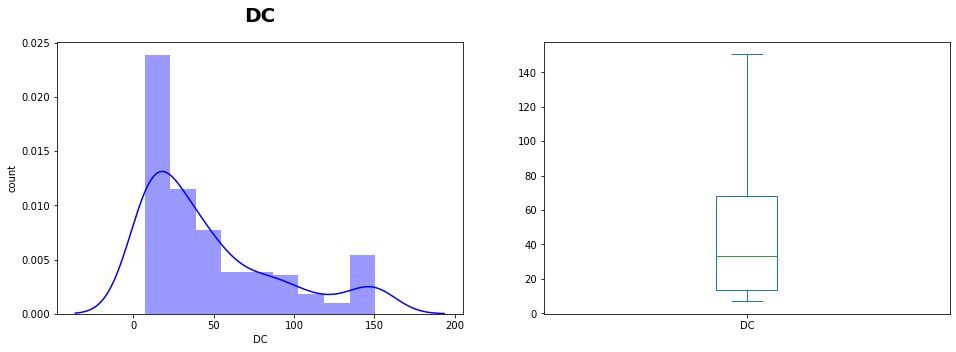

In [99]:
#Compare the distribution and box-plot after capping
plt.figure(1)
plt.subplot(121)
sns.distplot("DC",x=df["DC"],color='b',kde=True)
plt.title("DC",weight='bold',fontsize=20,pad=20)
plt.xlabel("DC")
plt.ylabel("count")
plt.subplot(122)
df["DC"].plot.box(figsize=(16,5))
plt.show()

**Initial Spread Index (ISI)**

<AxesSubplot:xlabel='ISI'>

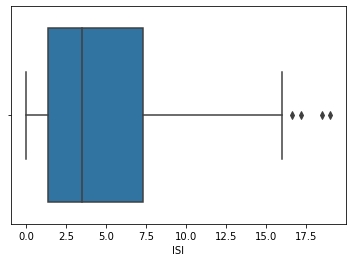

In [100]:
#Box-plot for the skewed feature
sns.boxplot(df['ISI'])

In [102]:
#Finding the IQR
percentile25 = df['ISI'].quantile(0.25)
percentile75 = df['ISI'].quantile(0.75)
IQR=percentile75-percentile25
IQR

5.9

In [103]:
#upper and lower limit
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
upper_limit,lower_limit

(16.150000000000002, -7.450000000000001)

In [104]:
#Capping(Winsorization)
df['ISI'] = np.where(df['ISI'] >= upper_limit,
        upper_limit,
        np.where(df['ISI'] <= lower_limit,
        lower_limit,
        df['ISI']))
df.shape

(244, 13)

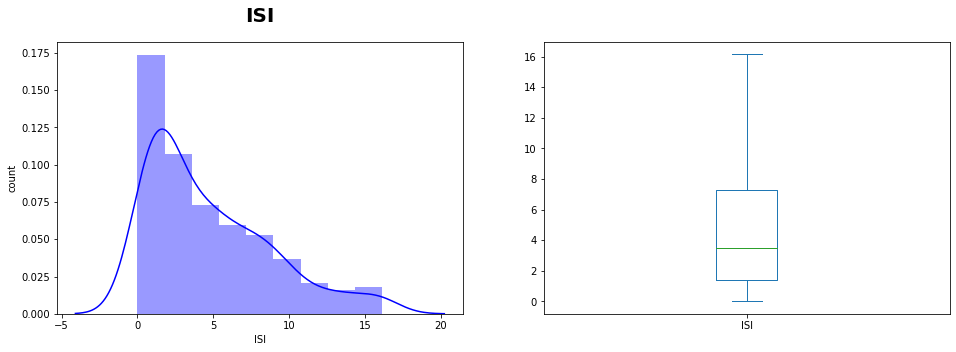

In [105]:
plt.figure(1)
plt.subplot(121)
sns.distplot("ISI",x=df["ISI"],color='b',kde=True)
plt.title("ISI",weight='bold',fontsize=20,pad=20)
plt.xlabel("ISI")
plt.ylabel("count")
plt.subplot(122)
df["ISI"].plot.box(figsize=(16,5))
plt.show()

**Buildup Index (BUI)**

<AxesSubplot:xlabel='BUI'>

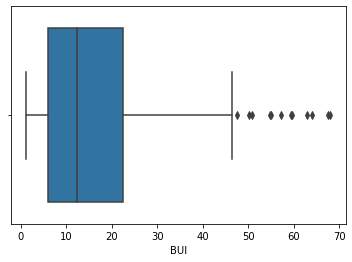

In [106]:
#Box-plot for the skewed feature
sns.boxplot(df['BUI'])

In [107]:
#Finding the IQR
percentile25 = df['BUI'].quantile(0.25)
percentile75 = df['BUI'].quantile(0.75)
IQR=percentile75-percentile25
IQR

16.525

In [108]:
#Capping(Winsorization)
df['BUI'] = np.where(df['BUI'] >= upper_limit,
        upper_limit,
        np.where(df['BUI'] <= lower_limit,
        lower_limit,
        df['BUI']))
df.shape

(244, 13)

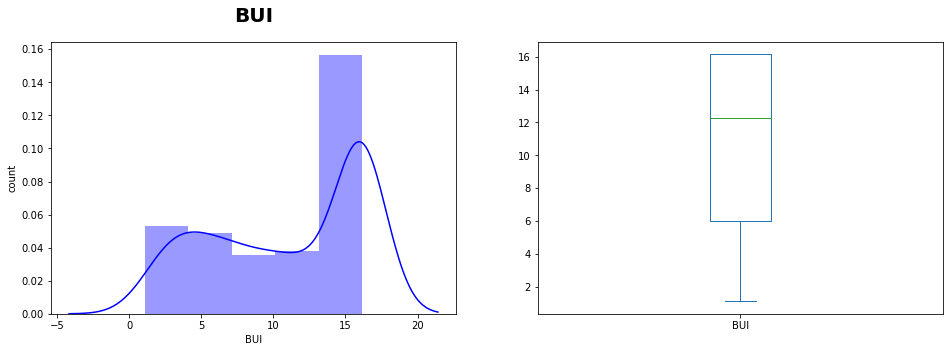

In [109]:
plt.figure(1)
plt.subplot(121)
sns.distplot("BUI",x=df["BUI"],color='b',kde=True)
plt.title("BUI",weight='bold',fontsize=20,pad=20)
plt.xlabel("BUI")
plt.ylabel("count")
plt.subplot(122)
df["BUI"].plot.box(figsize=(16,5))
plt.show()

**Fire Weather Index (FWI)**

<AxesSubplot:xlabel='FWI'>

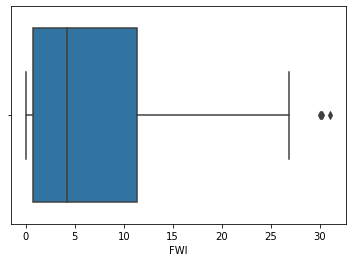

In [110]:
#Box-plot for the skewed feature
sns.boxplot(df['FWI'])

In [111]:
#Finding the IQR
percentile25 = df['FWI'].quantile(0.25)
percentile75 = df['FWI'].quantile(0.75)
IQR=percentile75-percentile25
IQR

10.675

In [112]:
#upper and lower limit
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
upper_limit,lower_limit

(27.387500000000003, -15.312500000000004)

In [113]:
#Capping(Winsorization)
df['FWI'] = np.where(df['FWI'] >= upper_limit,
        upper_limit,
        np.where(df['FWI'] <= lower_limit,
        lower_limit,
        df['FWI']))
df.shape

(244, 13)

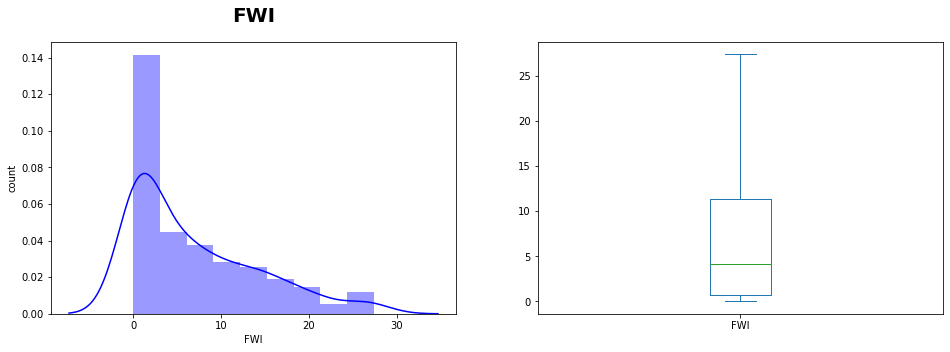

In [114]:
plt.figure(1)
plt.subplot(121)
sns.distplot("FWI",x=df["FWI"],color='b',kde=True)
plt.title("FWI",weight='bold',fontsize=20,pad=20)
plt.xlabel("FWI")
plt.ylabel("count")
plt.subplot(122)
df["FWI"].plot.box(figsize=(16,5))
plt.show()

In [116]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.475410,0.310861,78.288115,14.286066,47.625523,4.746721,11.027459,6.957172,0.434426,1.500000
std,3.633843,14.884200,2.565081,0.464097,13.283493,11.194393,43.109359,4.091906,5.269331,7.291162,0.496700,0.501028
min,22.000000,21.000000,9.500000,0.000000,47.737500,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,1.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,1.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.000000,1.500000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,16.150000,11.375000,1.000000,2.000000
max,42.000000,90.000000,21.500000,1.250000,96.000000,43.175000,150.462500,16.150000,16.150000,27.387500,1.000000,2.000000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    int32         
 11  Region       244 non-null    int32         
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int32(4)
memory usage: 21.1 KB


**Observation:**
* The datatypes  were wrong and there was 247 rows and 15 columns
* The "Classes" column is the target to predict. i.e Regression Problem.
* There are outliers in the "RH", "Ws", "Rain","BUI","ISI","FFMC" and "FWI".
* Skewness is found in few of the columns will check it after handling outliers.
* Vehicle Rain ,Relative Humidity,WindSpeed  has  impact on the Forestfire.
* There where wrong dtype in FWI, which is relaced by arbitary number "Zero".
* Missing values in the categorical colum "Classes" was replaced with Mode value.
* Two columns are created newly to represent Region and Date.
* Left anf Right White spaces are removed from classes column and feature names.
* header and region name from the middile of the dataset were removed and indeces were resetted.
* We need data cleaning for this dataset.

In [115]:
####-----------Feature Engineering and Model Training in Next ipynb------------####